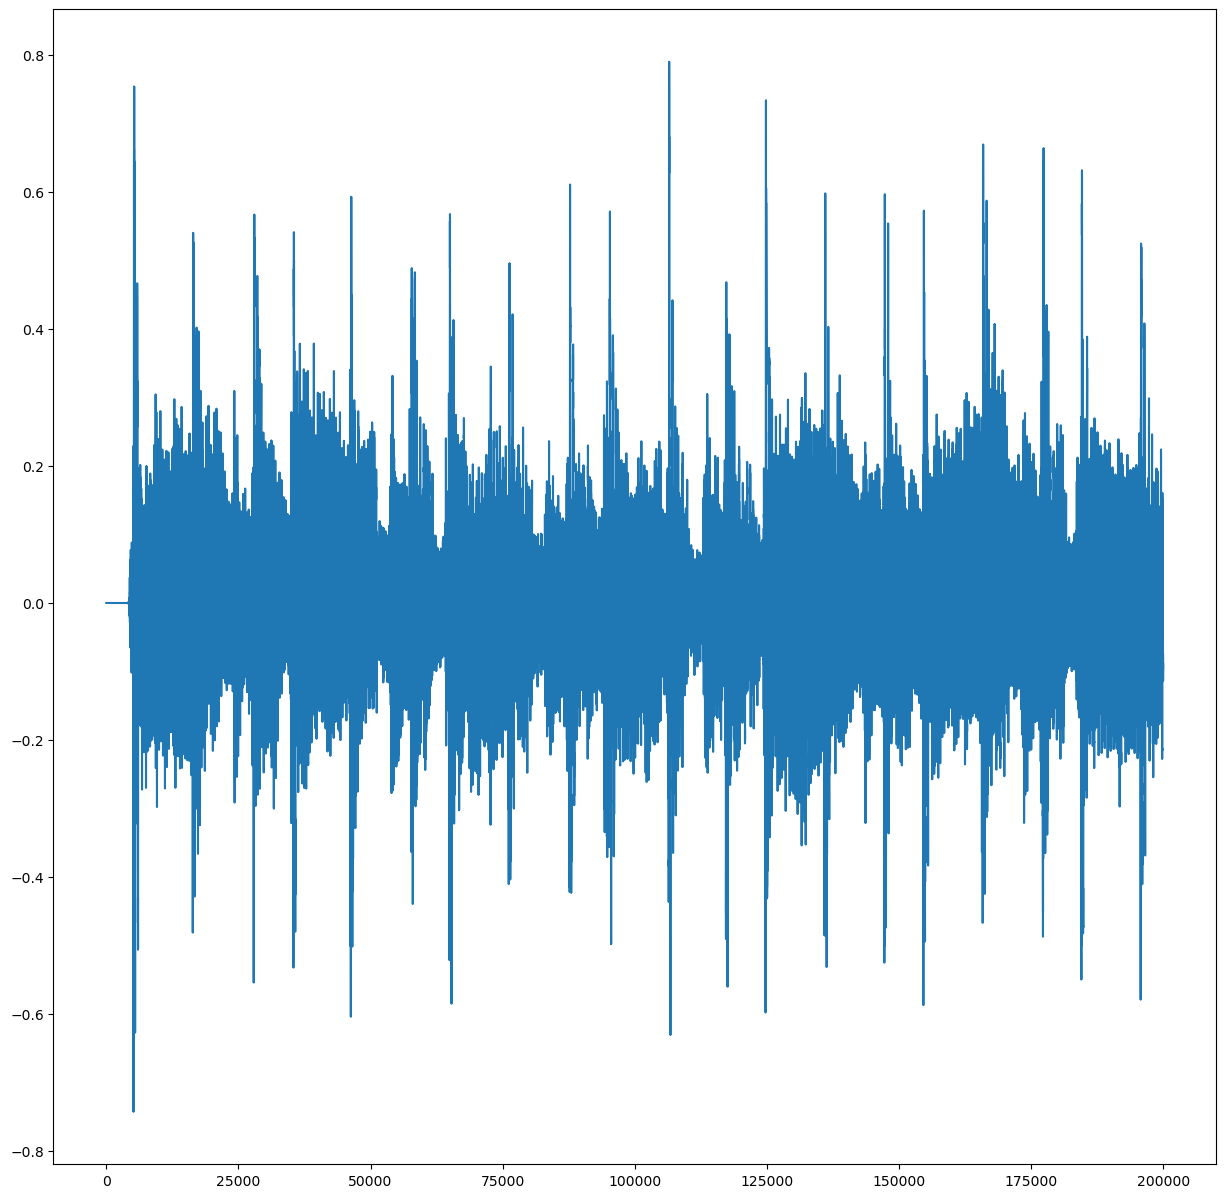

In [18]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

N1 = 22050
N2 = 16000

x, sr = librosa.load(librosa.example('fishin', hq=True), sr=N1)
x = x[0:200000]

fig, ax = plt.subplots(figsize=(15,15))
plt.plot(x)

Сигнал до изменений

In [12]:
from IPython.display import Audio
Audio(data=x, rate=N1)

## Растяжение и фильтрация

In [7]:
x_thinned = np.empty(shape=int(N2 * len(x)))
x_last = 0
for j in range(len(x_thinned)):
    if j % N2 == 0:
        x_thinned[j] = x[int(j / N2)]
        x_last = x_thinned[j]
    else:
        x_thinned[j] = x_last
        
from scipy import signal
b, a = signal.butter(3, 0.46)
y_filtered = signal.lfilter(b, a, x_thinned)

## Прореживание

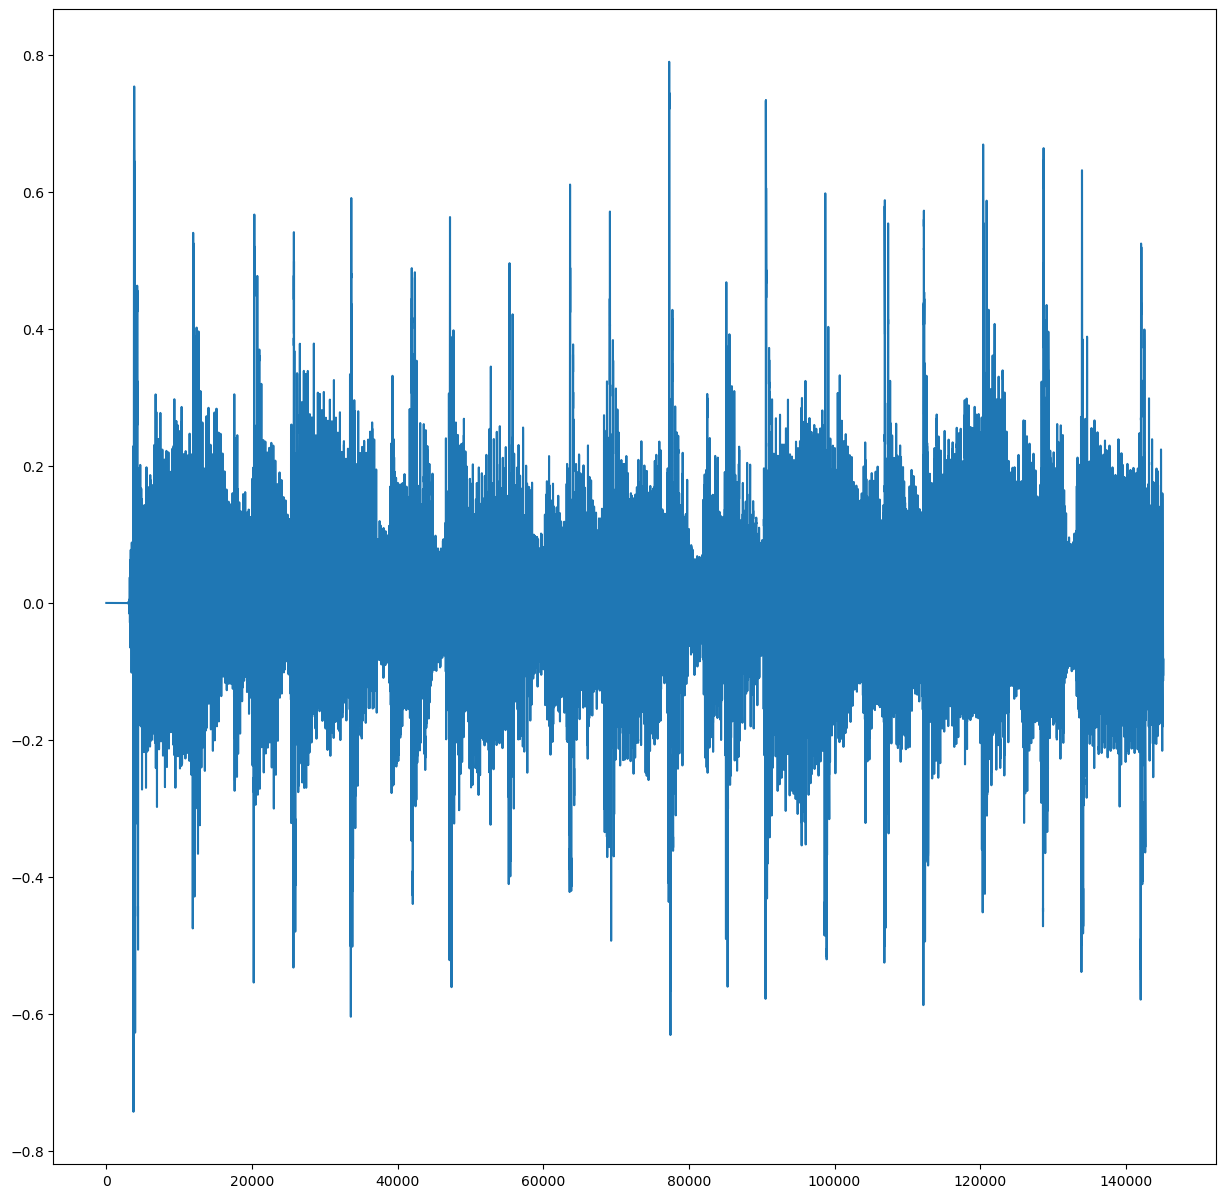

In [19]:
y = [y_filtered[j * N1] for j in range (int(len(y_filtered) / N1))]
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(y)

Сигнал после изменений

In [16]:
Audio(data=y, rate=N2)